*Calculating Euclidean Distance Between Passengers

.Import necessary libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#load df from titanic.csv
df = pd.read_csv("titanic.csv")

selecting features


In [7]:
# Select features (Age and Fare) and remove rows with NaN
features = df[["Age", "Fare"]].dropna()

# laod the df from titanic.csv
df = pd.read_csv("titanic.csv")

# Calculate Euclidean distance between the first two passengers
def euclidean_distance(u, v):
    return np.sqrt(np.sum((u - v) ** 2))

passenger1 = features.iloc[0].values
passenger2 = features.iloc[1].values
distance = euclidean_distance(passenger1, passenger2)
print(f"Euclidean Distance between Passenger 1 and Passenger 2: {distance:.2f}")

Euclidean Distance between Passenger 1 and Passenger 2: 66.00


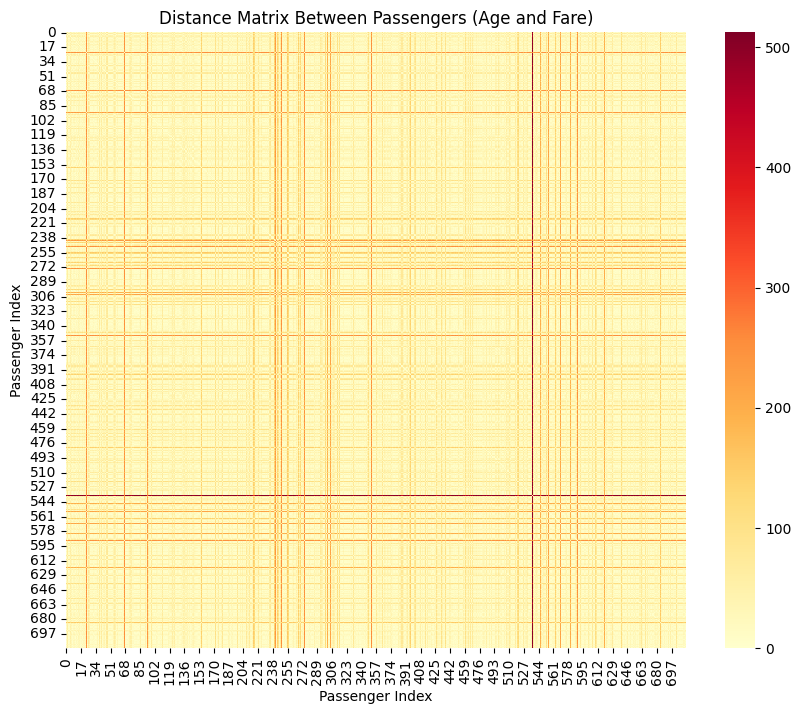

In [8]:
# Calculate distances for all pairs and store in a matrix
n = len(features)
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = euclidean_distance(features.iloc[i].values,
                                                 features.iloc[j].values)

# Visualize the distance matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap="YlOrRd", annot=False)
plt.title("Distance Matrix Between Passengers (Age and Fare)")
plt.xlabel("Passenger Index")
plt.ylabel("Passenger Index")
plt.show()

filltering passengers by survived and not survived

Average Distance Among Survived Passengers: 64.87
Average Distance Among Survived Not Passengers: 32.18


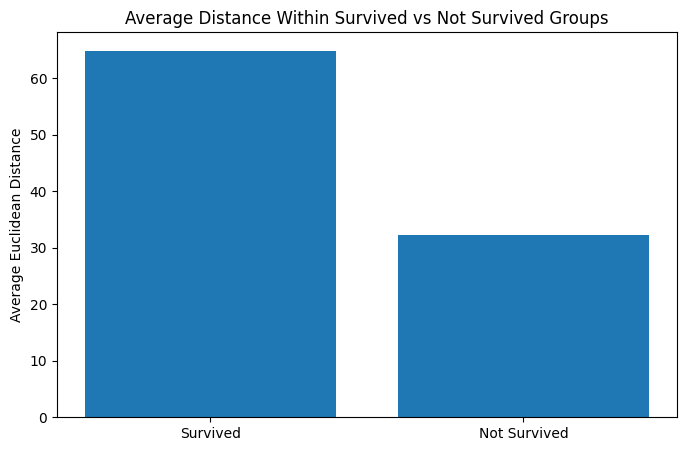

In [14]:
# Filter survived and not survived passengers
survived_features = df[df["Survived"] == 1][["Age","Fare"]].dropna()
not_survived_features = df[df["Survived"] == 0][["Age","Fare"]].dropna()

# Calculate average distance within each group
def avg_distance_within_group(group):
    n = len(group)
    total_distance = 0
    for i in range(n):
        for j in range(i + 1, n):
            total_distance += euclidean_distance(group.iloc[i].values,
                                               group.iloc[j].values)
    return total_distance / (n * (n - 1) / 2) if n > 1 else 0
        
avg_dist_survived = avg_distance_within_group(survived_features)
avg_dist_not_survived = avg_distance_within_group(not_survived_features)
print(f"Average Distance Among Survived Passengers: {avg_dist_survived:.2f}")
print(f"Average Distance Among Survived Not Passengers: {avg_dist_not_survived:.2f}")

# Visualize comparison
plt.figure(figsize=(8, 5))
plt.bar(["Survived", "Not Survived"], [avg_dist_survived, avg_dist_not_survived])
plt.title("Average Distance Within Survived vs Not Survived Groups")
plt.ylabel("Average Euclidean Distance")
plt.show()

normalized survived passengers

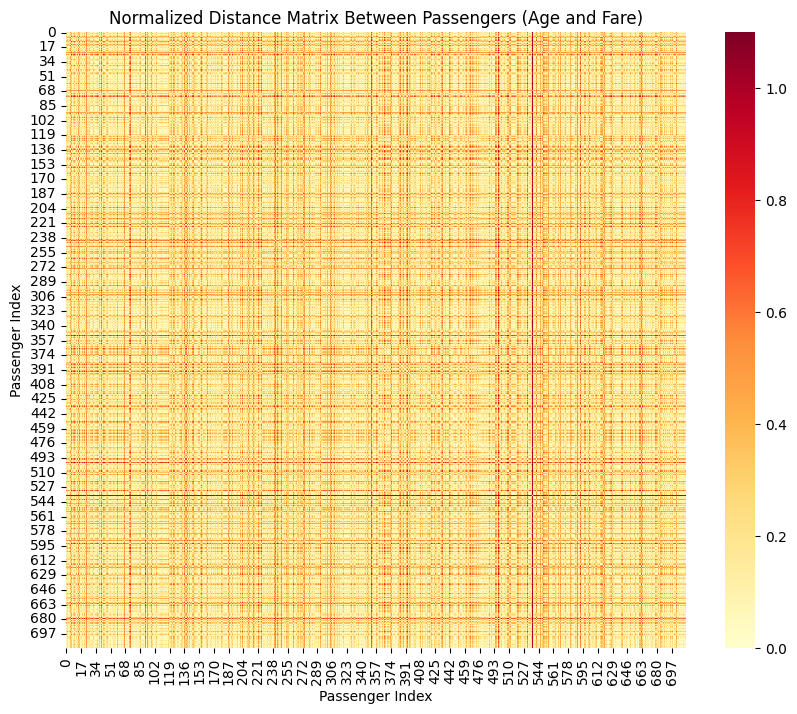

In [15]:
# Normalize the features
def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

normalized_features = normalize_data(features)

# Recalculate distance with normalized data
n = len(normalized_features)
normalized_distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        normalized_distance_matrix[i, j] = euclidean_distance(
            normalized_features.iloc[i].values,
            normalized_features.iloc[j].values
        )

# Visualize normalized distance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_distance_matrix, cmap="YlOrRd", annot=False)
plt.title("Normalized Distance Matrix Between Passengers (Age and Fare)")
plt.xlabel("Passenger Index")
plt.ylabel("Passenger Index")
plt.show()

Normalized Average Distance Among Survived: 0.27
Normalized Average Distance Among Not Survived: 0.26


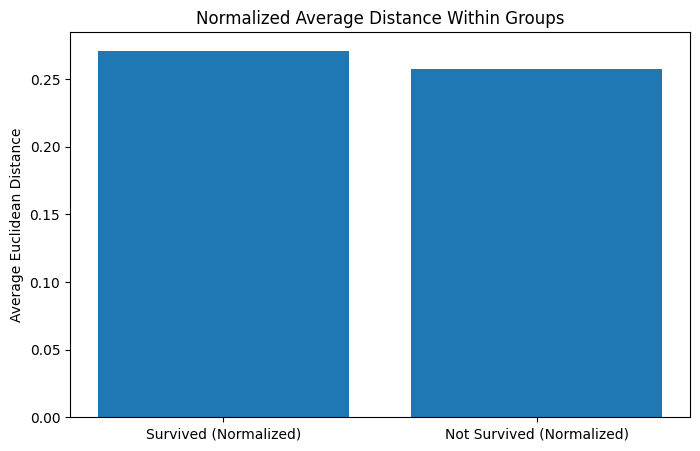

In [17]:
# Filter normalized survived and not normalized survived passengers
normalized_survived = normalize_data(survived_features)
normalized_not_survived = normalize_data(not_survived_features)


# Calculate average distance within each group
avg_dist_norm_survived = avg_distance_within_group(normalized_survived)
avg_dist_norm_not_survived = avg_distance_within_group(normalized_not_survived)
print(f"Normalized Average Distance Among Survived: {avg_dist_norm_survived:.2f}")
print(f"Normalized Average Distance Among Not Survived: {avg_dist_norm_not_survived:.2f}")

# Visualize comparison
plt.figure(figsize=(8, 5))
plt.bar(["Survived (Normalized)", "Not Survived (Normalized)"],
        [avg_dist_norm_survived, avg_dist_norm_not_survived])
plt.title("Normalized Average Distance Within Groups")
plt.ylabel("Average Euclidean Distance")
plt.show()